<a href="https://colab.research.google.com/github/ShindeParth31/EDA-on-Student-dataset/blob/main/student_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

# Read the uploaded CSV file into a pandas DataFrame, specifying semicolon as delimiter
df = pd.read_csv(list(uploaded.keys())[0], sep=';')

# Display first 5 rows
df.head()

Saving student-mat.csv to student-mat (1).csv
Saving student-por.csv to student-por (1).csv


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [10]:
df.isnull().sum()


,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [11]:
df.dtypes


,0
school,object
sex,object
age,int64
address,object
famsize,object
Pstatus,object
Medu,int64
Fedu,int64
Mjob,object
Fjob,object


In [12]:
df.shape


(395, 33)

In [13]:
# Fill numerical missing values with median
df.fillna(df.median(numeric_only=True), inplace=True)



In [14]:
df = df.drop_duplicates()


In [15]:
avg_g3 = df['G3'].mean()
avg_g3


np.float64(10.415189873417722)

In [16]:
students_above_15 = df[df['G3'] > 15].shape[0]
students_above_15


40

In [17]:
correlation = df['studytime'].corr(df['G3'])
correlation


np.float64(0.09781968965319626)

In [18]:
df.groupby('sex')['G3'].mean()


,G3
sex,
F,9.966346
M,10.914439


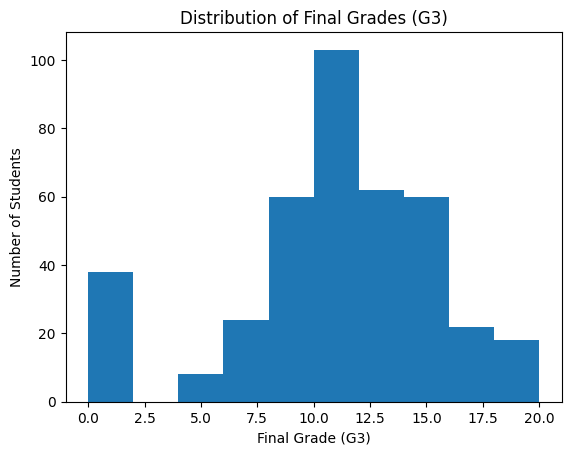

In [19]:
plt.figure()
plt.hist(df['G3'], bins=10)
plt.xlabel("Final Grade (G3)")
plt.ylabel("Number of Students")
plt.title("Distribution of Final Grades (G3)")
plt.show()


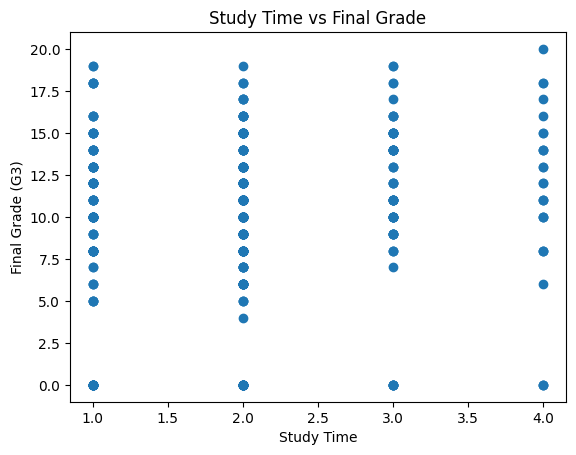

In [20]:
plt.figure()
plt.scatter(df['studytime'], df['G3'])
plt.xlabel("Study Time")
plt.ylabel("Final Grade (G3)")
plt.title("Study Time vs Final Grade")
plt.show()


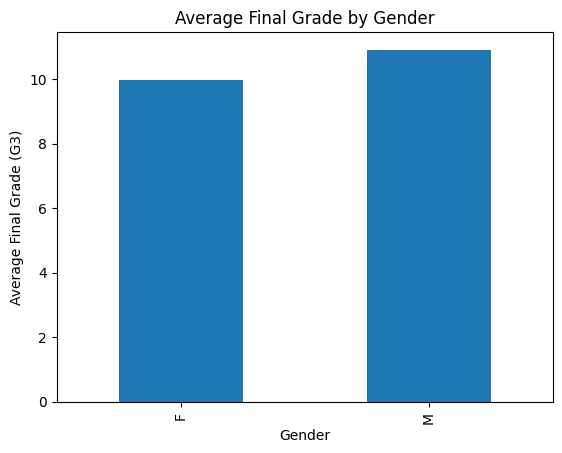

In [21]:
avg_gender = df.groupby('sex')['G3'].mean()

plt.figure()
avg_gender.plot(kind='bar')
plt.xlabel("Gender")
plt.ylabel("Average Final Grade (G3)")
plt.title("Average Final Grade by Gender")
plt.show()
